
# Linear Regression Model
---

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


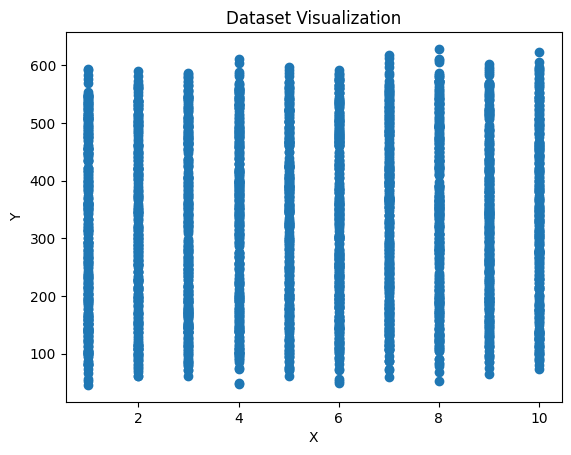

In [21]:

# Load dataset
data = pd.read_csv('crop_yield_data.csv')

# Preparar X (características) y Y (variable objetivo)
X = data['soil_quality_index'].values 
Y = data['crop_yield'].values

# Visualize dataset
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset Visualization')
plt.show()


In [22]:
# Normalizar los datos
X = data.drop('crop_yield', axis=1).values 
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Añadir columna de unos para el término independiente (bias)
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
n_features = X.shape[1]
weights = np.zeros(n_features)  # Inicializar pesos incluyendo el bias
learning_rate = 0.002
epochs = 1000
n = len(X)

# Store history for visualization
loss_history = []

In [23]:
# Gradient Descent
for epoch in range(epochs):
    # Predictions
    Y_pred = np.dot(X, weights)
    
    # Calculate and store loss (MSE)
    loss = np.mean((Y - Y_pred) ** 2)
    loss_history.append(loss)
    
    # Calculate gradients
    gradients = -(2/n) * np.dot(X.T, (Y - Y_pred))
    
    # Update weights
    weights = weights - learning_rate * gradients

# Calcular predicciones finales
Y_pred_final = np.dot(X, weights)

# Calcular MSE y R² finales
mse = np.mean((Y - Y_pred_final) ** 2)
r_squared = 1 - (np.sum((Y - Y_pred_final) ** 2) / np.sum((Y - np.mean(Y)) ** 2))

In [24]:
print(f"\nResultados finales:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r_squared:.4f}")


Resultados finales:
Mean Squared Error (MSE): 42.70
R-squared: 0.9980


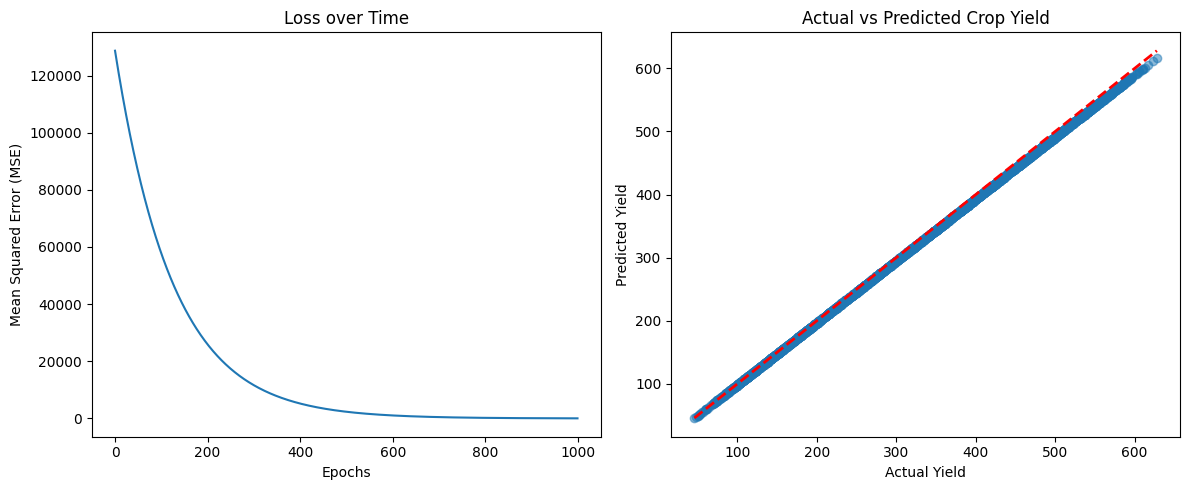


Importancia de las características:
              Feature      Weight
0                bias  322.137668
3  farm_size_hectares  140.913605
5       fertilizer_kg   15.877640
1         rainfall_mm   12.690879
2  soil_quality_index    5.657040
4      sunlight_hours    0.156735


In [25]:
# Visualizaciones
plt.figure(figsize=(12, 5))

# Gráfico 1: Loss over time
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss over Time')

# Gráfico 2: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(Y, Y_pred_final, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Crop Yield')

plt.tight_layout()
plt.show()

# Mostrar importancia de las características
feature_names = ['bias', 'rainfall_mm', 'soil_quality_index', 'farm_size_hectares', 
                'sunlight_hours', 'fertilizer_kg']
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights
})
print("\nImportancia de las características:")
print(feature_importance.sort_values(by='Weight', ascending=False))